In [218]:
import numpy as np
import pandas as pd
import matplotlib as mpl

In [219]:
df = pd.read_csv("data.csv")
df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [220]:
len(df)

24

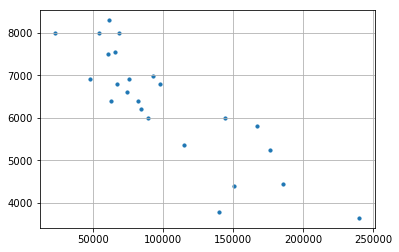

In [221]:
plt.scatter(df['km'], df['price'], s=10)
plt.grid()
plt.show()

In [222]:
# w = np.random.rand(len(df))
# b = np.random.rand(len(df))
w = np.random.uniform(0, 1)
b = np.random.uniform(0, 1)

In [223]:
real = df['price'].mean()
real

6331.833333333333

In [224]:
alpha = 0.01
prediction = 0
for i in range(len(df)):
    prediction += df.iloc[i]['km'] * w + b
prediction /= len(df)
error = (prediction - real) ** 2
dir_and_amount = (prediction - real) * df['km'].mean()
w -= dir_and_amount
 -= dir_and_amount




IndentationError: unexpected indent (<ipython-input-224-3a0619899cf2>, line 9)

In [214]:
shift = 0.1
for _ in range(10):
    print(w)
    av_calc = 0
    for i in range(len(df)):
        av_calc += df.iloc[i]['km'] * w[i] + b[i]
    av_calc /= len(df)
    if av_calc > av_real:
        w -= shift
    else:
        w += shift

-79923073.04584576


IndexError: invalid index to scalar variable.

In [177]:
title = np.genfromtxt('data.csv', dtype=np.unicode, delimiter=',')[:1]
title

array([['km', 'price']], dtype='<U6')

In [178]:
data = np.genfromtxt('data.csv', dtype=np.uint32, delimiter=',')[1:]
data

array([[240000,   3650],
       [139800,   3800],
       [150500,   4400],
       [185530,   4450],
       [176000,   5250],
       [114800,   5350],
       [166800,   5800],
       [ 89000,   5990],
       [144500,   5999],
       [ 84000,   6200],
       [ 82029,   6390],
       [ 63060,   6390],
       [ 74000,   6600],
       [ 97500,   6800],
       [ 67000,   6800],
       [ 76025,   6900],
       [ 48235,   6900],
       [ 93000,   6990],
       [ 60949,   7490],
       [ 65674,   7555],
       [ 54000,   7990],
       [ 68500,   7990],
       [ 22899,   7990],
       [ 61789,   8290]], dtype=uint32)

In [179]:
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [180]:
vector = np.array([1, 2, 3])
vector

array([1, 2, 3])

In [181]:
matrix = np.array([[1, 2, 3], [4, 5, 6]])
matrix

array([[1, 2, 3],
       [4, 5, 6]])

In [182]:
np.dot(vector, matrix.T)

array([14, 32])

In [183]:
matrix @ vector

array([14, 32])

In [184]:
np.dot(matrix, vector.T)

array([14, 32])

In [185]:
matrix * vector

array([[ 1,  4,  9],
       [ 4, 10, 18]])